<a href="https://colab.research.google.com/github/serivan/mldmlab/blob/master/09_K_Means_from_Scratch_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means is actually one of the simplest unsupervised clustering algorithm. Assume we have input data points $x_1,x:2,x:3,…,x_n$ and value of K(the number of clusters needed). We follow the below procedure:

1. Pick K points as the initial centroids from the data set, either randomly or the first K.

2. Find the Euclidean distance of each point in the data set with the identified K points — cluster centroids.

3. Assign each data point to the closest centroid using the distance found in the previous step.

4. Find the new centroid by taking the average of the points in each cluster group.

5. Repeat 2 to 4 for a fixed number of iteration or till the centroids don’t change.


In [98]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style
style.use('ggplot')
import matplotlib.colors as colors
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

To make our work organized we will build a class and proceed as in the steps above and also define a tolerance or threshold value for the SSE’s.

In [99]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}
        #Step 1
        idx = np.random.choice(len(data), self.k, replace=False)
        for i in range(self.k):
            self.centroids[i] = data[idx[i]]

        for i in range(self.max_iter):
            self.classifications = {}

            for j in range(self.k):
                self.classifications[j] = []

            for element in data:
                #Step 2
                distances = [np.linalg.norm(element-self.centroids[centroid]) for centroid in self.centroids]

                #Step 3
                classification = distances.index(min(distances))
                self.classifications[classification].append(element)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                #Step 4
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]

                #Check of Step 5
                change = np.linalg.norm(current_centroid-original_centroid)         
                print("Step: "+str(i)+" -- current centroid: " + str(current_centroid)+ "; original: "+ str(original_centroid)+ "; change: "+str(change))              
                if change > self.tol:
                    optimized = False

            if optimized:
                break
                
        return self.classifications

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

Now we can test our code

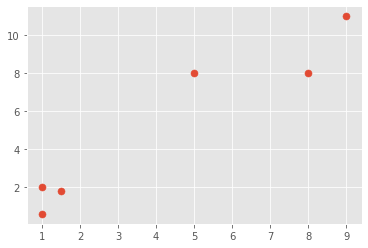

In [100]:

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])


colors_list = list(colors._colors_full_map.values())
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()


In [101]:
model = K_Means(k=2)
model.fit(X)

Step: 0 -- current centroid: [7.33333333 9.        ]; original: [ 9. 11.]; change: 2.6034165586355518
Step: 0 -- current centroid: [1.16666667 1.46666667]; original: [1.5 1.8]; change: 0.47140452079103173
Step: 1 -- current centroid: [7.33333333 9.        ]; original: [7.33333333 9.        ]; change: 0.0
Step: 1 -- current centroid: [1.16666667 1.46666667]; original: [1.16666667 1.46666667]; change: 0.0


{0: [array([5., 8.]), array([8., 8.]), array([ 9., 11.])],
 1: [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6])]}

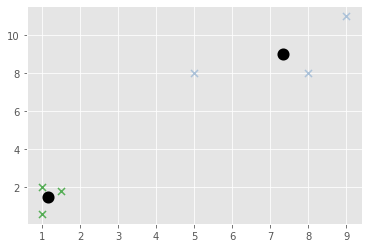

In [102]:
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=5)


for classification in model.classifications:
    color = colors_list[classification]
    for element in model.classifications[classification]:
        plt.scatter(element[0], element[1], marker="x", color=color, s=50, linewidths=5)

plt.show()